In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon = pd.read_csv("/Users/shraddhalipane/Downloads/Amazon - Movies and TV Ratings.csv")

In [3]:
amazon.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
amazon.shape                     ##checking the shape of the data set

(4848, 207)

In [5]:
amazon.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


<AxesSubplot:ylabel='Frequency'>

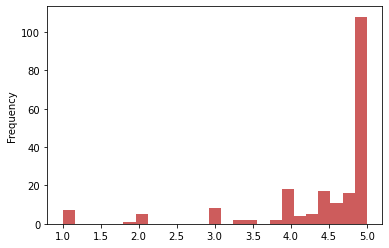

In [6]:
amazon.describe().T['mean'].plot(bins=25, kind='hist', color = 'indianred')      ## Movie that has maxmium ratings

<AxesSubplot:ylabel='Frequency'>

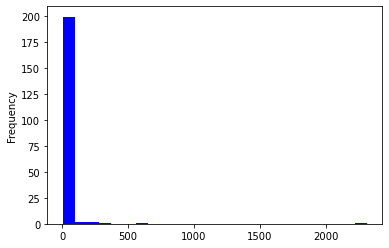

In [7]:
amazon.describe().T['count'].plot(bins=25, kind='hist', color = 'blue')

In [8]:
amazon.describe().T['count'].sort_values(ascending=False)[:1].to_frame()        #Movie that has maxmium view

,count
Movie127,2313.0


In [9]:
amazon.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()    #Movie that has maxmium ratings

,0
Movie127,9511.0


In [10]:
amazon.drop('user_id',axis=1).mean()      # Average rating of each movie

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [11]:
amazon.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()   #top 5 movies with the maximum rating

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [12]:
amazon.describe().T['count'].sort_values(ascending=True)[:5].to_frame()  #Top 5 movies with least audience

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [13]:
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [14]:
movie_data = amazon.melt(id_vars = amazon.columns[0],value_vars=amazon.columns[1:],var_name="Movies",value_name="Rating")

In [15]:
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [16]:
rd = Reader(rating_scale=(-1,10))
data = Dataset.load_from_df(movie_data.fillna(0),reader=rd)    #creating a dataset for training and testing
data

In [17]:
train_data,test_data = train_test_split(data,test_size=0.20)   #recommendation model on training data

In [18]:
svd = SVD()  ##Using SVD (Singular Value Descomposition)

In [19]:
svd.fit(train_data)

In [20]:
pred = svd.test(test_data)    #predictions on the test data

In [21]:
accuracy.rmse(pred)

RMSE: 0.2747


0.2746954379460033

In [22]:
accuracy.mae(pred)

MAE:  0.0406


0.040635768829954115

In [23]:
u_id='AH3QC2PC1VTGP'
mv = 'Movie206'
r_id = 5.0
svd.predict(u_id, mv, r_ui=r_id, verbose= True)

user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = -0.01   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=5.0, est=-0.00500184459465469, details={'was_impossible': False})

In [24]:
from surprise.model_selection import cross_validate

In [25]:

cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2843  0.2779  0.2854  0.2825  0.0033  
MAE (testset)     0.0427  0.0419  0.0426  0.0424  0.0004  
Fit time          31.30   31.24   31.45   31.33   0.09    
Test time         2.06    1.78    1.77    1.87    0.13    


{'test_rmse': array([0.28425677, 0.27785075, 0.2854387 ]),
 'test_mae': array([0.04265225, 0.04187589, 0.04259983]),
 'fit_time': (31.301368951797485, 31.242600917816162, 31.45310688018799),
 'test_time': (2.057347059249878, 1.7775869369506836, 1.770655870437622)}

In [26]:
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()


In [27]:
amazon= amazon.iloc[:3000, :50]
movie_data = amazon.melt(id_vars = amazon.columns[0],value_vars=amazon.columns[1:],var_name="Movies",value_name="Rating")

In [28]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0292  1.0276  1.0306  1.0291  0.0012  
MAE (testset)     1.0124  1.0119  1.0130  1.0124  0.0005  
Fit time          4.42    4.41    4.42    4.42    0.01    
Test time         0.18    0.18    0.36    0.24    0.08    
{'test_rmse': array([1.02915612, 1.02758808, 1.03055303]), 'test_mae': array([1.01235589, 1.01186141, 1.012983  ]), 'fit_time': (4.416123867034912, 4.406246185302734, 4.424214839935303), 'test_time': (0.1843409538269043, 0.18363595008850098, 0.36414003372192383)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########



/var/folders/s_/gb05tr917kx1q7y_b9cg68z00000gn/T/ipykernel_2131/127061997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0558  0.0542  0.0603  0.0568  0.0026  
MAE (testset)     0.0072  0.0073  0.0073  0.0073  0.0000  
Fit time          4.42    4.44    4.45    4.44    0.01    
Test time         0.19    0.41    0.18    0.26    0.11    
{'test_rmse': array([0.05584192, 0.05417376, 0.06033794]), 'test_mae': array([0.007233  , 0.00731813, 0.00734259]), 'fit_time': (4.418649673461914, 4.438545227050781, 4.453851699829102), 'test_time': (0.18562698364257812, 0.4069199562072754, 0.1815640926361084)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.61   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.61   {'was_impossible': False}
##########



/var/folders/s_/gb05tr917kx1q7y_b9cg68z00000gn/T/ipykernel_2131/127061997.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0674  0.0488  0.0692  0.0618  0.0092  
MAE (testset)     0.0053  0.0058  0.0055  0.0055  0.0002  
Fit time          4.47    4.39    4.50    4.45    0.05    
Test time         0.36    0.18    0.35    0.29    0.08    
{'test_rmse': array([0.06736011, 0.04881916, 0.06923751]), 'test_mae': array([0.00533674, 0.00575458, 0.00554176]), 'fit_time': (4.472685098648071, 4.39152193069458, 4.497669219970703), 'test_time': (0.3556180000305176, 0.17505598068237305, 0.3464021682739258)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.91   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.91   {'was_impossible': False}
##########



In [29]:
from surprise.model_selection import GridSearchCV

In [30]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [ ]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [ ]:
gs.best_score

In [ ]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])